In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from scipy import signal

import h5py

In [2]:
%matplotlib notebook

In [3]:
%reload_ext autoreload
%autoreload 2

In [4]:
import sys
sys.path.append('../../nadavp/new_trap/PythonScripts/')
import BeadDataFile
from discharge_tools import *

# Noise vs exposure

In [7]:
fname = '/home/data_transfer/data_from_windows/20190708/Bead2/Discharge/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(735,785)]

In [64]:
BDFs1 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


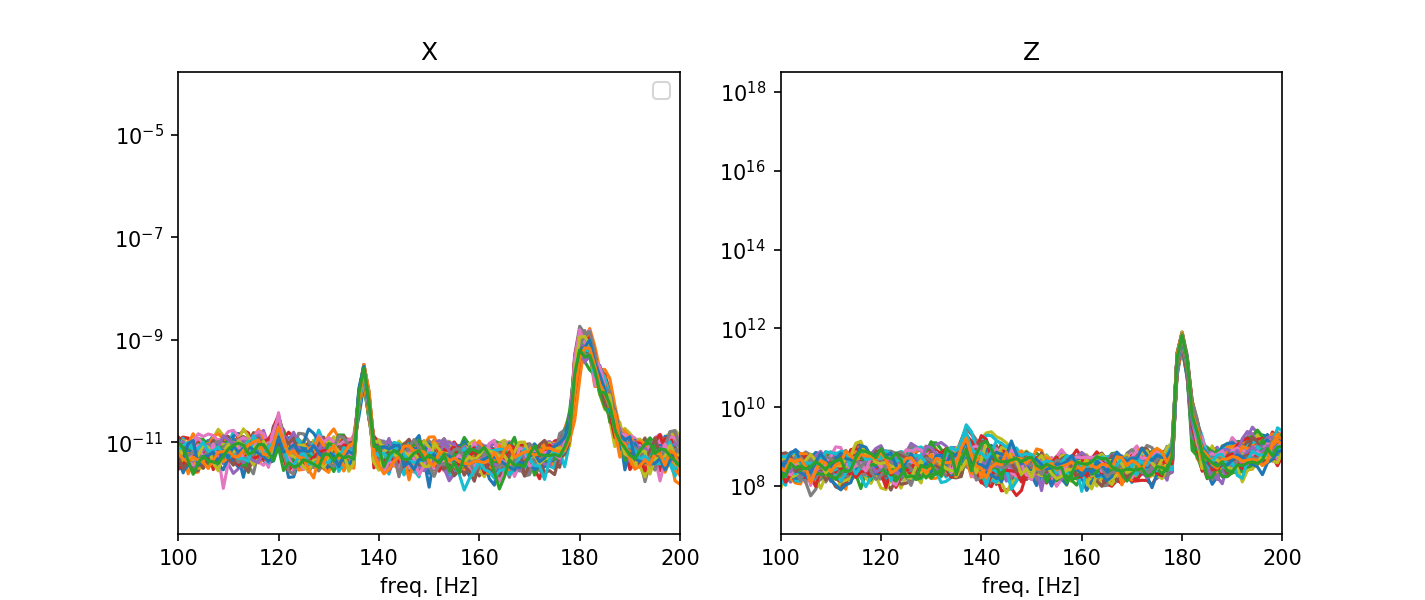

No handles with labels found to put in legend.


In [68]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax[0].semilogy(*BDF_.welch_psd('x', res = 5000)) for BDF_ in BDFs1[::3]]
[ax[1].semilogy(*BDF_.welch_psd('z', res = 5000)) for BDF_ in BDFs1[::3]]
ax[0].set_title('X')
ax[1].set_title('Z')
[a.set(xlim=(100,200),xlabel='freq. [Hz]') for a in ax]
ax[0].legend()

In [48]:
freq = 23
responses = [B.response_at_freq('y',drive_freq=freq,bandwidth=0.5) for B in BDF_signal]

In [49]:
varss = []
means = []
rr = range(5000,50000,1000)
for i in rr:
    if i%100==0:
        print(i,end=' ')
    varss.append(np.std([np.std(resp_[:i]) for resp_ in responses]))
    means.append(np.mean([np.std(resp_[:i]) for resp_ in responses]))

5000 6000 7000 8000 9000 10000 11000 12000 13000 14000 15000 16000 17000 18000 19000 20000 21000 22000 23000 24000 25000 26000 27000 28000 29000 30000 31000 32000 33000 34000 35000 36000 37000 38000 39000 40000 41000 42000 43000 44000 45000 46000 47000 48000 49000 

<IPython.core.display.Javascript object>


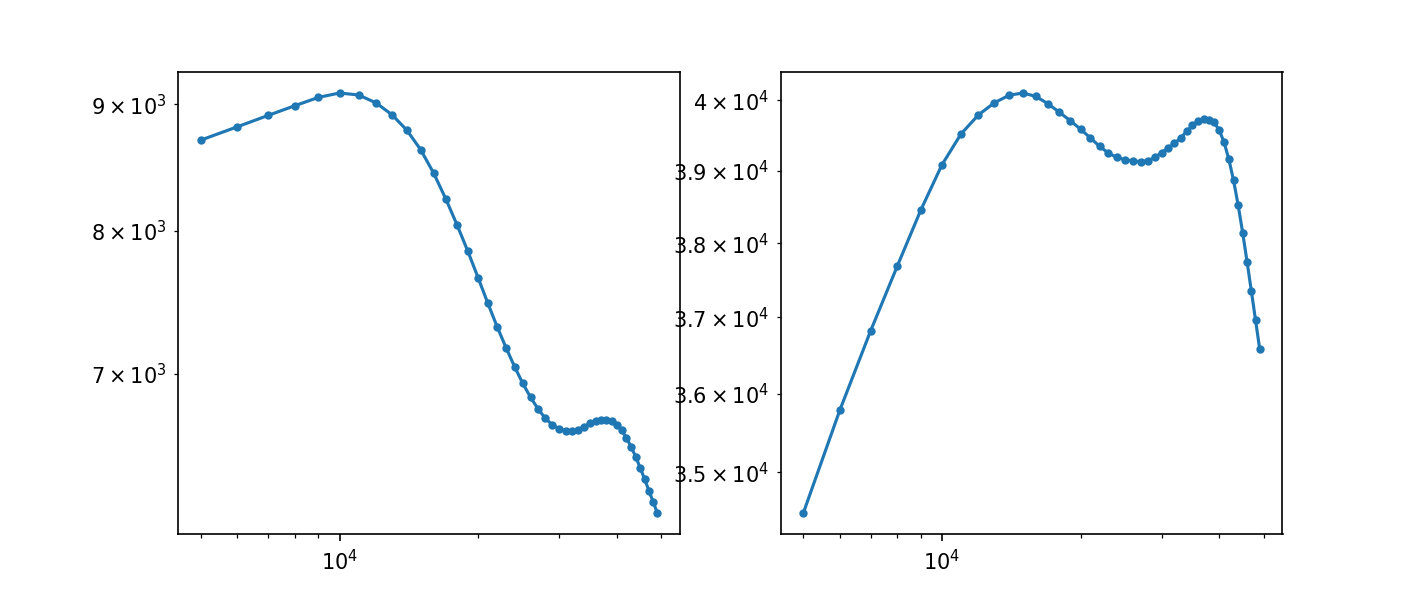

In [50]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].loglog(rr,np.array(varss),'.-')
ax[1].loglog(rr,means,'.-')

In [125]:
def resp(x, drive_freq):
    bandwidth = 0.1
    b, a = signal.butter(3, [2.*(drive_freq-bandwidth/2.)/5000, 2.*(drive_freq+bandwidth/2.)/5000 ], btype = 'bandpass')
    responsefilt = signal.filtfilt(b, a, x)
    return responsefilt

In [95]:
longX = []
for B in BDFs:
    longX.append(B.xyz[0])

In [96]:
longX = np.array(longX)
longX = longX.flatten()

In [97]:
longX.shape

(2500000,)

In [218]:
rr = np.arange(1000,110000,50)
longX_amp = []
freq = 25
for i in rr:
    resp_tmp = resp(longX[10000:10000+i], freq)
    longX_amp.append(np.std(resp_tmp)) 

<IPython.core.display.Javascript object>


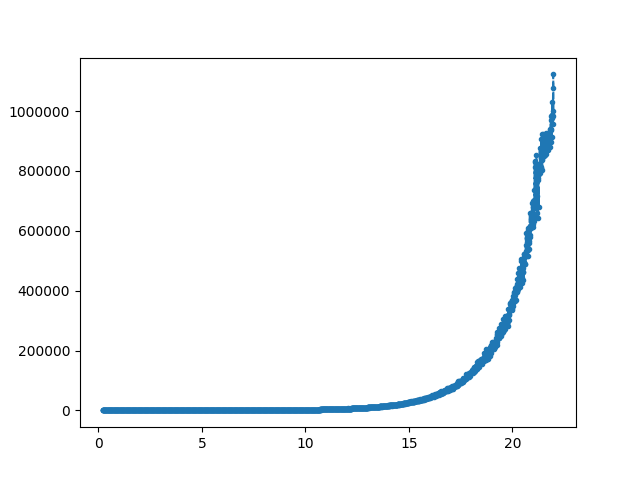

In [224]:
_,ax = plt.subplots()
pp = np.array(longX_amp)
ax.plot(rr/5000,pp, '.--')
# ax.set(xlim=(0,5),ylim=(0,2))

[0.08572673] 0.9959746137886126 1.0014648799670092 501


<IPython.core.display.Javascript object>


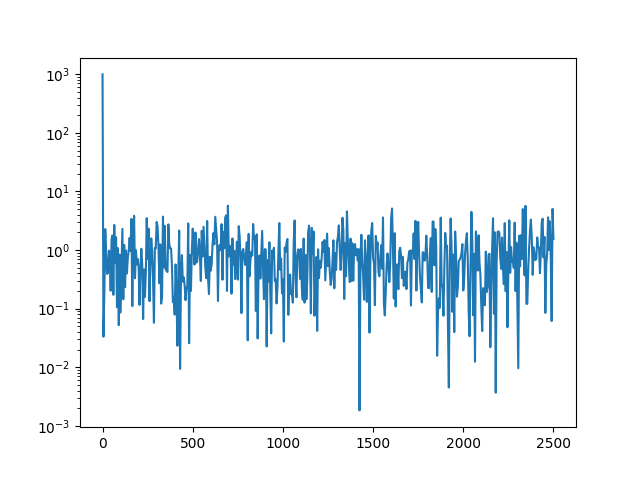

In [124]:
N = 1000
data = np.random.normal(1,1,N)

fft = np.abs(np.fft.rfft(data, norm='ortho'))**2
freq = np.fft.rfftfreq(len(data), d=1./5000)

print(fft[freq==100], np.std(fft[1:]), np.mean(fft[1:]), len(freq))

_,ax = plt.subplots()
ax.semilogy(freq,fft)

In [76]:
result = []
i = 16000
temp = []
temp2 = []
for j in range(1,100):
    data = np.random.normal(0,1,i)
    fft = np.abs(np.fft.rfft(data, norm='ortho'))**2
    freq = np.fft.rfftfreq(len(data), d=1./5000)
    temp.append(fft[freq==20])
    temp2.append(np.mean(fft[1:]))
np.std(temp), np.std(temp2)

(0.8270431432906862, 0.010441749029506321)

## Noise analysis - 20190708

In [86]:
fname = '/home/data_transfer/data_from_windows/20190708/Bead2/NoiseFlutuation/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(105,295) if (ff_!=195)] ## 195 is corrupted
BDFs3 = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


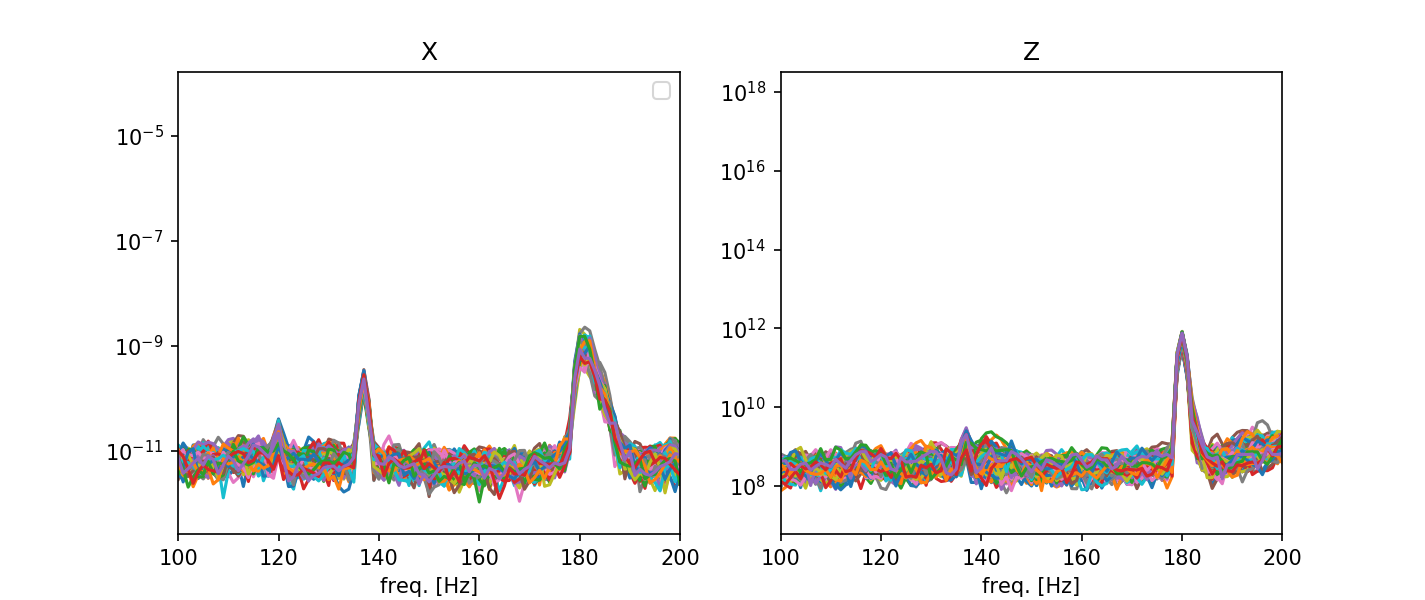

No handles with labels found to put in legend.


In [62]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax[0].semilogy(*BDF_.welch_psd('x', res = 5000)) for BDF_ in BDFs[::2]]
[ax[1].semilogy(*BDF_.welch_psd('z', res = 5000)) for BDF_ in BDFs[::2]]
ax[0].set_title('X')
ax[1].set_title('Z')
[a.set(xlim=(100,200),xlabel='freq. [Hz]') for a in ax]
ax[0].legend()

<IPython.core.display.Javascript object>


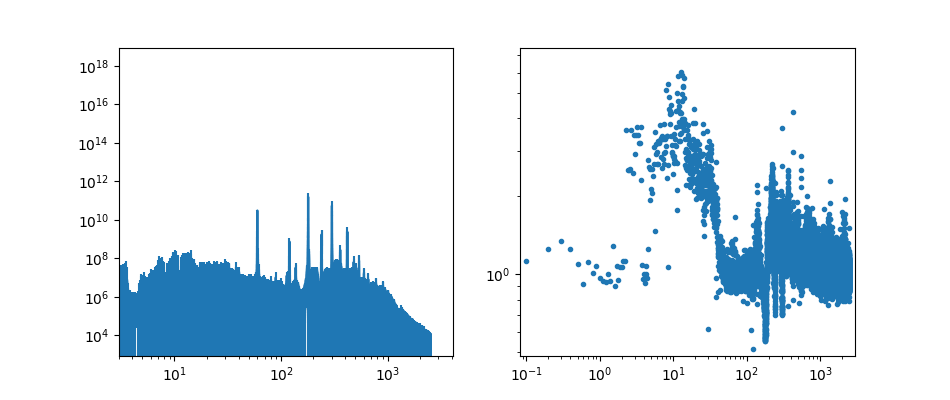

(array([4440287.50623132]), array([4173017.2294229]))

In [660]:
all_error = np.std(np.array([BDF_.psd2('z', res = 5000)[1] for BDF_ in BDFs2]),axis=0)
all_mean = np.mean(np.array([BDF_.psd2('z', res = 5000)[1] for BDF_ in BDFs2]),axis=0)
freqs = BDFs2[0].psd2('z', res = 5000)[0]
_,ax = plt.subplots(1,2,figsize=(9.5,4))
ax[0].errorbar(freqs, all_mean, all_error)
ax[0].set(xlim=(3,None),yscale='log',xscale='log')
ax[1].loglog(freqs,all_error/all_mean,'.')
all_mean[freqs==52], all_error[freqs==52]

In [126]:
result_data = []
i = 40000
temp = []
temp2 = []
for B in BDFs:
    data = B.x2[:i]
    fft = np.abs(np.fft.rfft(data, norm='ortho'))**2
    freq = np.fft.rfftfreq(len(data), d=1./5000)
    temp.append(fft[freq==20])
    temp2.append(np.mean(fft[(freq>80)*(freq<90)]))
np.std(temp), np.std(temp2)

(3.169717256755346e-07, 1.430320474177021e-09)

In [318]:
BDFs[79].z2.shape

(50000,)

In [8]:
BDFs2 = BDFs[:70] + BDFs[74:77] + BDFs[78:]

In [1294]:
def normdata(data):
    a_segmented = []
    for dd in data.reshape(-1, 5000):
        sos = signal.butter(10, 100, 'hp', fs=5000, output='sos')
        filtered = signal.sosfilt(sos, dd)
        a_segmented.append(np.mean(filtered))
    a_segmented = np.array(a_segmented)
    ss = data.reshape(-1, 5000)
    ss = np.array([ss_/a_*np.mean(data) for ss_,a_ in zip(ss,a_segmented)])
    return ss.flatten()

<IPython.core.display.Javascript object>


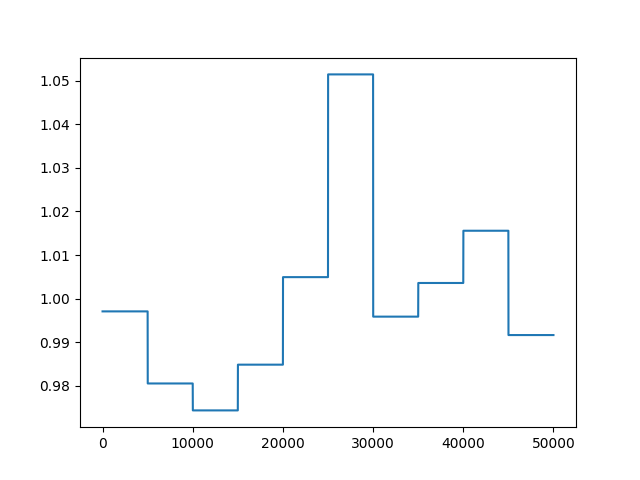

In [639]:
data = BDFs2[0].y2
_,ax = plt.subplots()
ax.plot(range(50000),data/normdata(data))

In [1159]:
weights = []
for B in BDFs:
    data = B.z2[:i]
    fft = np.abs(np.fft.rfft(data, norm='ortho'))**2
    freq = np.fft.rfftfreq(len(data), d=1./5000)
    weights.append(np.mean(fft[(freq>0)*(freq<2)]))

<IPython.core.display.Javascript object>


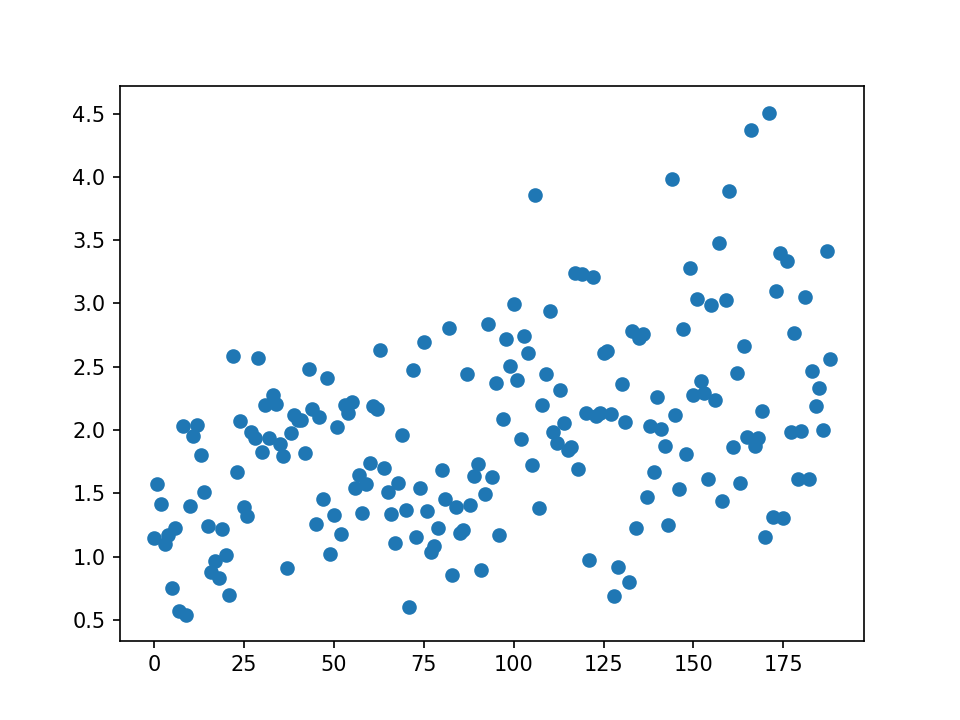

In [1161]:
weights = 1/np.array(weights)*1e6
_,ax = plt.subplots()
ax.scatter(range(len(weights)),weights)

In [1162]:
BDFs2 = [BDFs[i] for i in range(len(weights)) if weights[i]>1]
len(BDFs2)

174

In [1202]:
norm1 = norm

In [9]:
result_data5 = []
for i in range(5000,50000,1000):
    temp = []
    temp2 = []
    for B in BDFs2:
        data = B.z2[:i]
        fft = np.abs(np.fft.rfft(data, norm='ortho'))
        freq = np.fft.rfftfreq(len(data), d=1./5000)
#         temp.append(fft[freq==180])
        norm = np.mean(fft[(freq>70)*(freq<75)])
        temp2.append(np.mean(fft[(freq>50)*(freq<55)]))
#     print(sum((freq>22)*(freq<24)))
    result_data5.append(np.std(temp2))

<IPython.core.display.Javascript object>


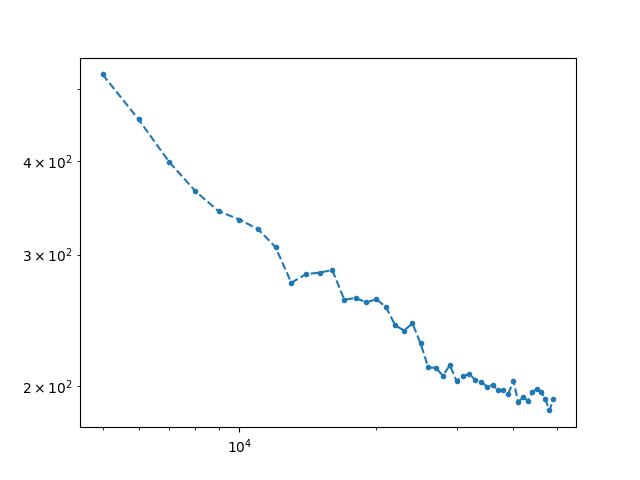

In [10]:
_,ax = plt.subplots()
# ax.plot(range(5000,50000,1000),result_data,'.--')
# ax.plot(range(5000,50000,1000),result_data1, '.--')
# ax.loglog(range(5000,50000,1000),result_data2, '.--')
# ax.loglog(range(5000,50000,1000),result_data4, '.--')
ax.loglog(range(5000,50000,1000),result_data5, '.--')
# ax.set(ylim=(1000000,None))

<IPython.core.display.Javascript object>


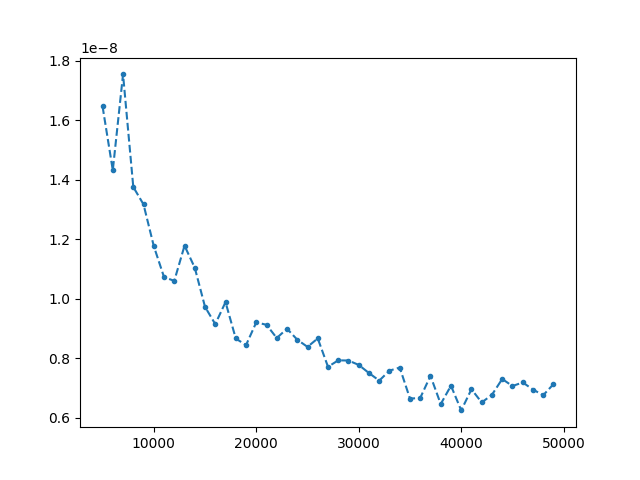

In [480]:
_,ax = plt.subplots()
ax.plot(range(5000,50000,1000),result_data3,'.--')
# ax.set(ylim=(100000,None))

<IPython.core.display.Javascript object>


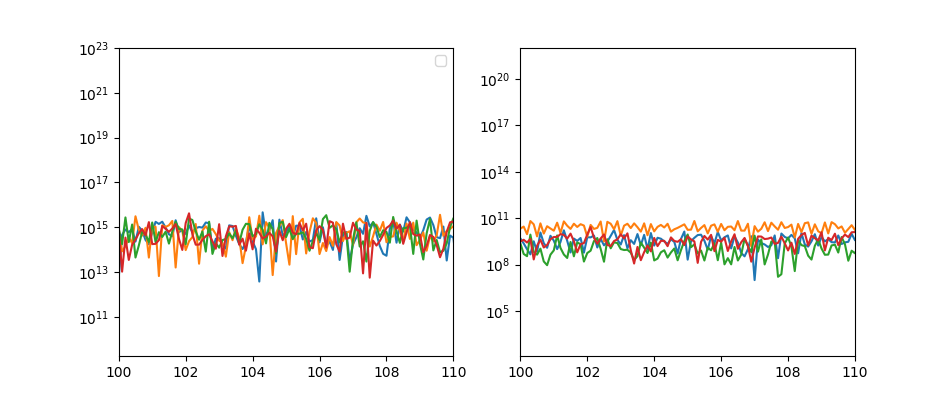

No handles with labels found to put in legend.


In [465]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
[ax[0].semilogy(*BDF_.psd('x', res = 50000)) for BDF_ in BDFs[70:74]]
[ax[1].semilogy(*BDF_.psd('z', res = 50000)) for BDF_ in BDFs[70:74]]
[a.set(xlim=(100,110)) for a in ax]
ax[0].legend()

### Noise analysis - 20190710

In [81]:
fname = '/home/data_transfer/data_from_windows/20190710/Bead1/NoiseFluctuation/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(29,128)]
BDFs = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


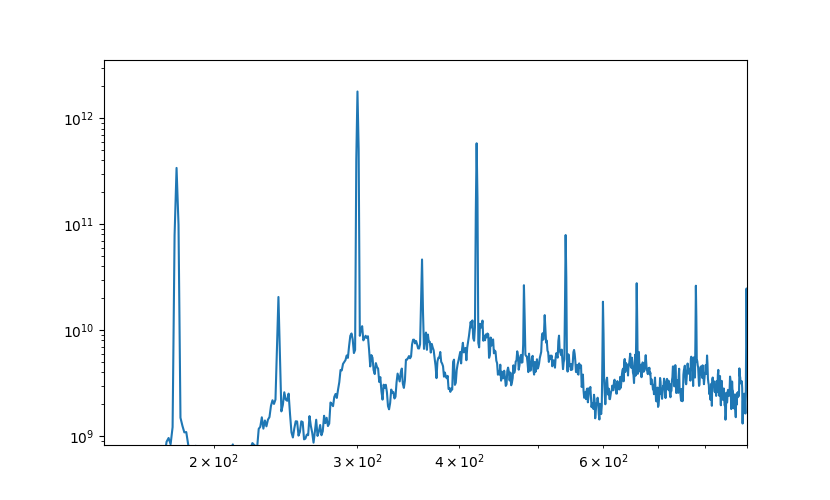

[(3, 3696.8940915707826)]

In [6]:
B_tmp = BeadDataFile.BeadDataFile('/home/data_transfer/data_from_windows/20190710/Bead1/NoiseFluctuation/Discharge_87.h5')
_,ax = plt.subplots()
ax.loglog(*B_tmp.welch_psd('z', res=5000))
ax.set(xlim=(3,None))

<IPython.core.display.Javascript object>


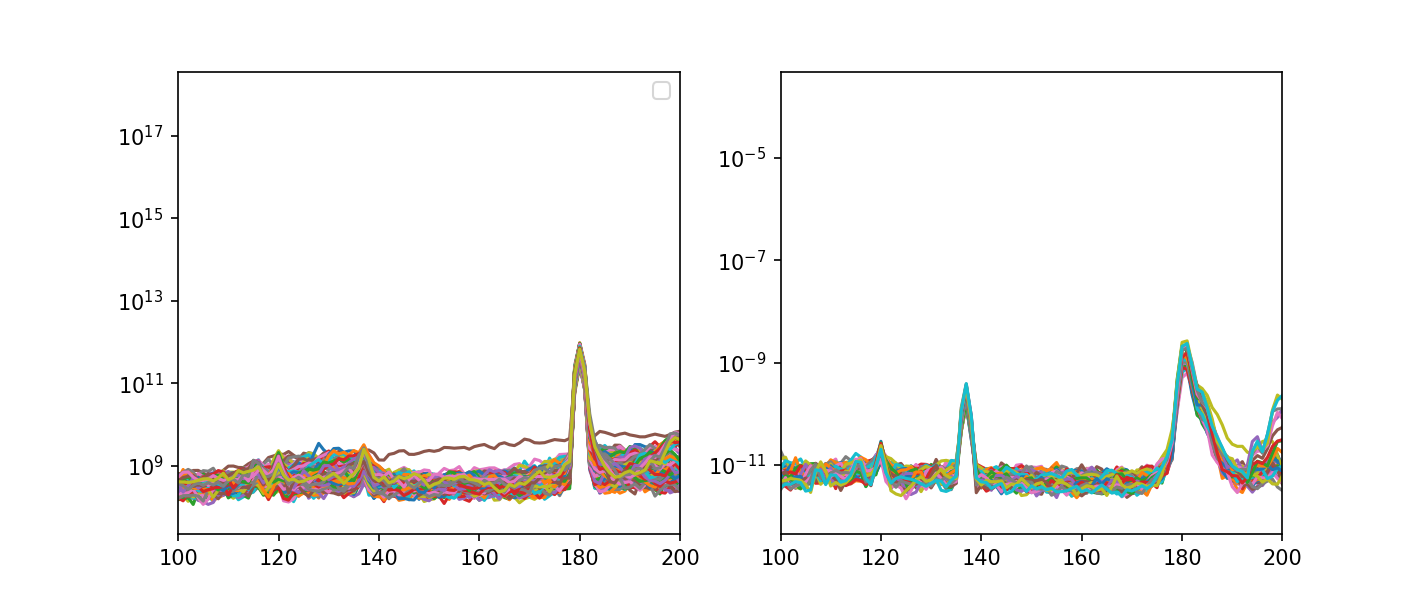

No handles with labels found to put in legend.


In [76]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
# [ax[0].loglog(*BDF_.psd2('x'), label=t_) for BDF_,t_ in zip(BDFs,fnames)]
# [ax[0].loglog(*BDF_.welch_psd('x', res = 5000)) for BDF_ in BDFs[58:70:2]]
# [ax[1].loglog(*BDF_.welch_psd('z', res = 5000)) for BDF_ in BDFs[85:100:2]]
[ax[0].semilogy(*BDF_.welch_psd('z', res = 5000)) for BDF_ in BDFs[::]]
[ax[1].semilogy(*BDF_.welch_psd('x', res = 5000)) for BDF_ in BDFs[::2]]
[a.set(xlim=(100,200)) for a in ax]
ax[0].legend()

In [923]:
len(BDFs)

98

In [746]:
weights = []
for B in BDFs:
    data = B.z2[:i]
    fft = np.abs(np.fft.rfft(data, norm='ortho'))**2
    freq = np.fft.rfftfreq(len(data), d=1./5000)
    weights.append(np.sum(fft[(freq>0)*(freq<2)]))
weights = np.array(weights1)

In [747]:
weights = np.array(weights)
weights1.shape

(99,)

In [926]:
import math
def weighted_avg_and_std(values, weights):
    """
    Return the weighted average and standard deviation.

    values, weights -- Numpy ndarrays with the same shape.
    """
    average = np.average(values, weights=weights)
    # Fast and numerically precise:
    variance = np.average((values-average)**2, weights=weights)
    return (average, math.sqrt(variance))

In [748]:
weights = 1/weights*1e4

In [83]:
weights1 /= 10

<IPython.core.display.Javascript object>


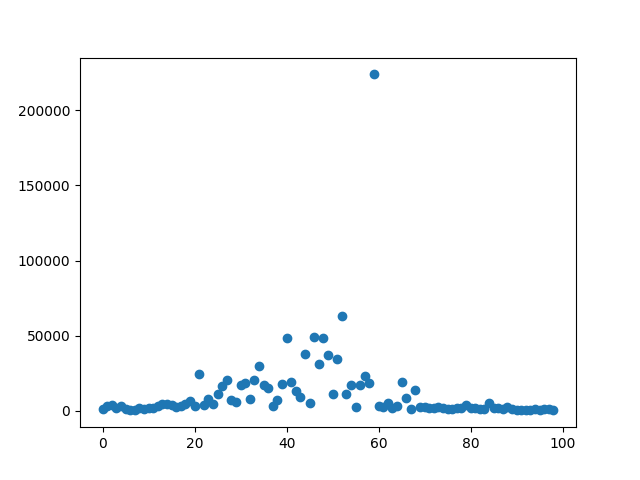

In [750]:
_,ax = plt.subplots()
ax.scatter(range(len(weights)),weights)
# ax.scatter(range(len(weights1)),weights1)

In [741]:
th = 1.5
BDFs3 = [BDFs[i] for i in range(len(weights1)) if (weights[i]<th)]
BDFs4 = [BDFs[i] for i in range(len(weights1)) if (weights[i]>th)]

In [742]:
len(BDFs4)

92

In [100]:
result_data = []
for i in range(5000,150000,5000):
    temp = []
    temp2 = []
    data = BDFs[0].x2[:i]
    fft = np.abs(np.fft.rfft(data,norm='ortho'))
    freq = np.fft.rfftfreq(len(data), d=1./5000)
    norm1 = np.sum(fft[(freq>141)*(freq<170)])
    for B in BDFs[::]:
        data = B.x2[:i]
        fft = np.abs(np.fft.rfft(data,norm='ortho'))
#         norm = np.sum(fft[(freq>141)*(freq<170)])
        temp2.append(np.mean(fft[(freq>150)*(freq<152)]))
    result_data.append(np.std(temp2))

<IPython.core.display.Javascript object>


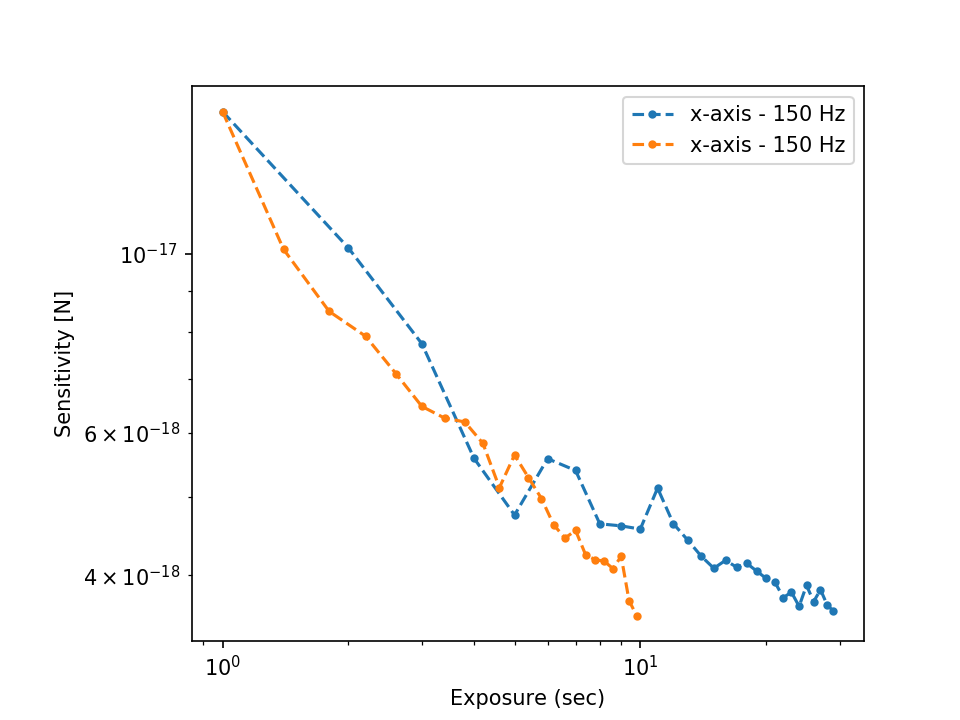

In [102]:
_,ax = plt.subplots()
# ax.plot(range(5000,150000,5000),result_data,'.--')
ax.loglog(np.arange(5000,150000,5000)/5000,1.5e-17*np.array(result_data/result_data[0]),'.--',label='x-axis - 150 Hz')
ax.loglog(np.arange(5000,50000,2000)/5000,1.5e-17*np.array(result_data3/result_data3[0]),'.--',label='x-axis - 150 Hz')
# ax.loglog(range(5000,150000,5000),result_data3/result_data3[0],'.--',)
# ax.loglog(np.arange(5000,50000,1000)/5000,1.5e-17*np.array(result_data5/result_data5[0]), '.--',label='different bead and day')
# ax.loglog(np.arange(5000,50000,1000)/5000,1.5e-17*np.array(result_data55/result_data55[0]), '.--',label='different bead and day - 150Hz')
# ax.loglog(np.arange(5000,150000,5000)/5000,1.5e-17*np.array(result_data6/result_data6[0]), '.--',label='x-axis')
# ax.loglog(np.arange(5000,150000,5000)/5000,1.5e-17*np.array(result_data7/result_data7[0]), '.--',label='x-axis 150Hz')
# ax.loglog(np.arange(5000,150000,5000)/5000,1.5e-17*np.array(result_data8/result_data8[0]), '.--',label='x-axis 150Hz - no norm')
ax.legend()
ax.set(xlabel='Exposure (sec)', ylabel='Sensitivity [N]')
# print(result_data8[-1]/result_data8[0], np.sqrt(5000/145000.))
plt.subplots_adjust(left=.2)
# ax.set(ylim=(1000000,None)

### Can we integrate longer?

In [365]:
BDFs_d = BDFs[0:58]+BDFs[76:] # noisy: [59, 65, 68, 74]

In [366]:
result_d1 = []
for i in range(5000,150000,5000):
    temp = []
    temp2 = []
    for B in BDFs_d:
        data = B.z2[:i]
        fft = np.abs(np.fft.rfft(data,norm='ortho'))
        freq = np.fft.rfftfreq(len(data), d=1./5000)
        temp2.append(np.mean(fft[(freq>4)*(freq<6)]))
    result_d1.append(np.std(temp2))
result_d1 = np.array(result_d1)

<IPython.core.display.Javascript object>


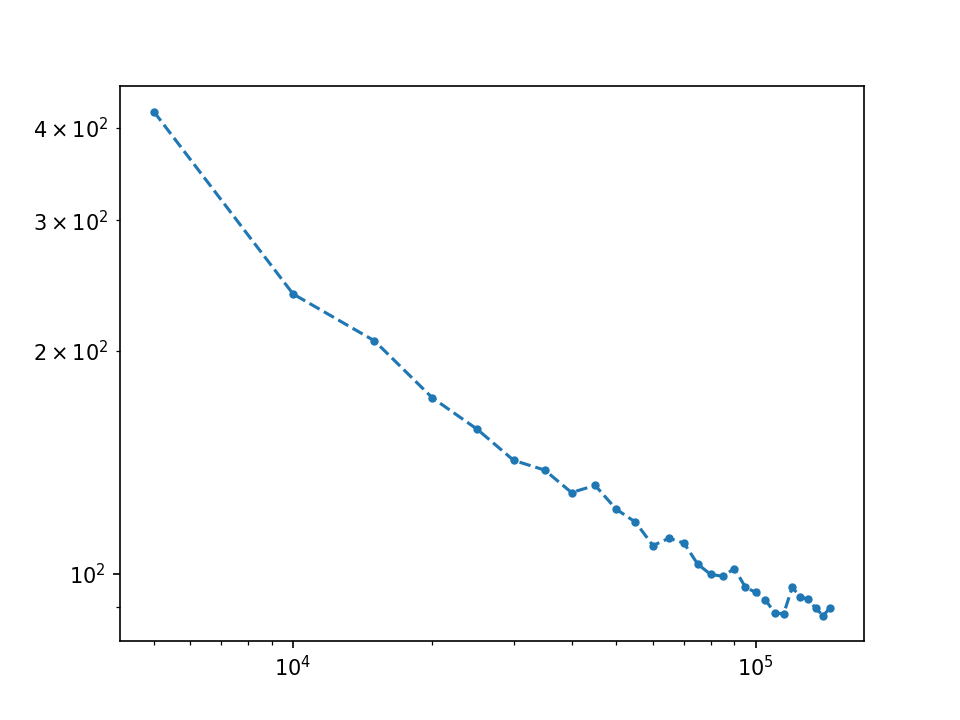

In [367]:
_,ax = plt.subplots()
ax.loglog(range(5000,150000,5000),result_d1,'.--')

In [869]:
BDF_xx = BDFs[0]
BDF_xx2 = BDFs[50]
spec = BDF_xx.x2.reshape(-1,5000)
spec2 = BDF_xx2.x2.reshape(-1,5000)

In [870]:
len(spec.T)

5000

In [871]:
fft = np.array([np.abs(np.fft.rfft(data,norm='ortho')) for data in spec])
fft2 = np.array([np.abs(np.fft.rfft(data,norm='ortho')) for data in spec2])
freq = np.fft.rfftfreq(len(spec.T), d=1./5000)

<IPython.core.display.Javascript object>


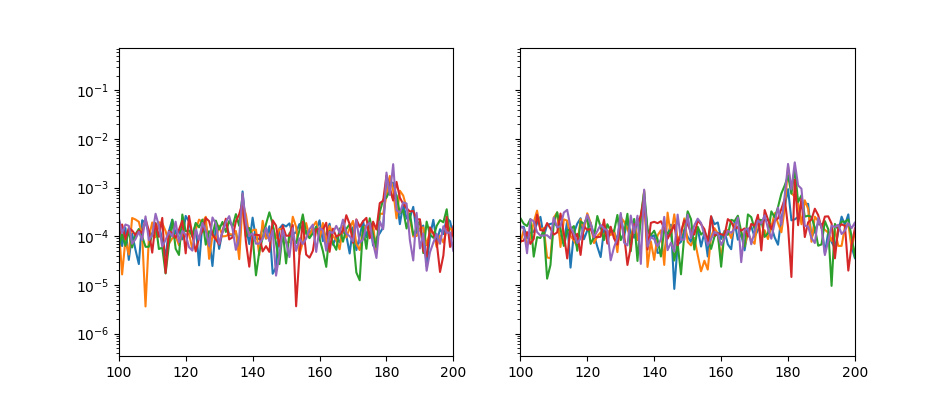

[[(100, 200)], [(100, 200)]]

In [872]:
_,ax = plt.subplots(1,2,figsize=(9.5,4),sharex=True, sharey=True)
_ = [ax[0].semilogy(freq,f) for f in fft[::2]]
_ = [ax[1].semilogy(freq,f) for f in fft2[::2]]
[a.set(xlim=(100,200)) for a in ax]

In [820]:
sss = np.mean(spec2,axis=1)*1e-7
sss.shape, 300*500

((100,), 150000)

<IPython.core.display.Javascript object>


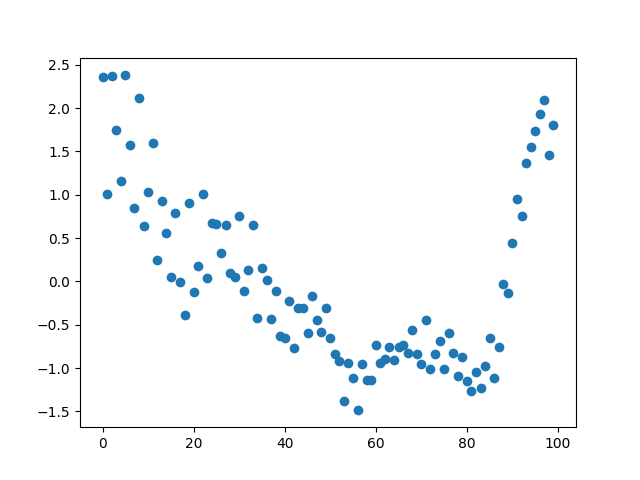

(9.177812961412068e-10, 7.1831350449415724e-12)

In [826]:
_,ax = plt.subplots()
ax.scatter(range(len(sss)),(sss-np.mean(sss))/np.std(sss))
np.mean(sss), np.std(sss)

In [864]:
lownoise2 = [np.sum(f[(freq>100*(freq<105))]) for f in fft2]
lownoise2 += [np.sum(f[(freq>100*(freq<105))]) for f in fft]

<IPython.core.display.Javascript object>


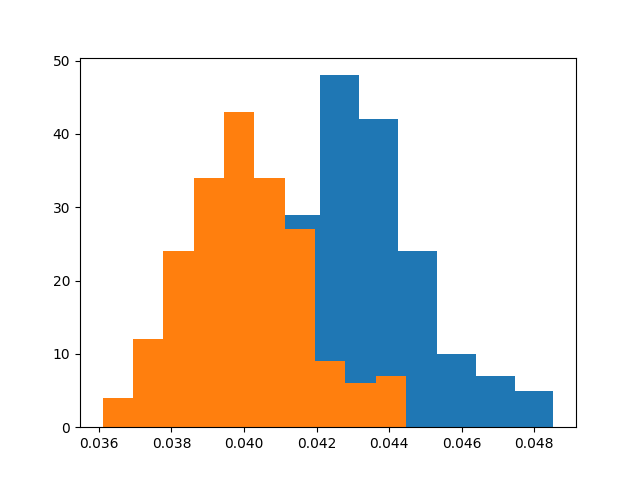

(array([ 4., 12., 24., 34., 43., 34., 27.,  9.,  6.,  7.]),
 array([0.03610098, 0.03693782, 0.03777467, 0.03861151, 0.03944836,
        0.0402852 , 0.04112205, 0.04195889, 0.04279574, 0.04363258,
        0.04446943]),
 <a list of 10 Patch objects>)

In [865]:
_,ax = plt.subplots()
ax.hist(lownoise, bins=10)
ax.hist(lownoise2, bins=10)

In [37]:
fname = '/home/data_transfer/data_from_windows/20190712/Bead1/SignalFluctuation/Discharge_{}.h5'
files = [fname.format(ff_) for ff_ in range(30,103)]
BDF_signal = [BeadDataFile.BeadDataFile(fname_) for fname_ in files]

<IPython.core.display.Javascript object>


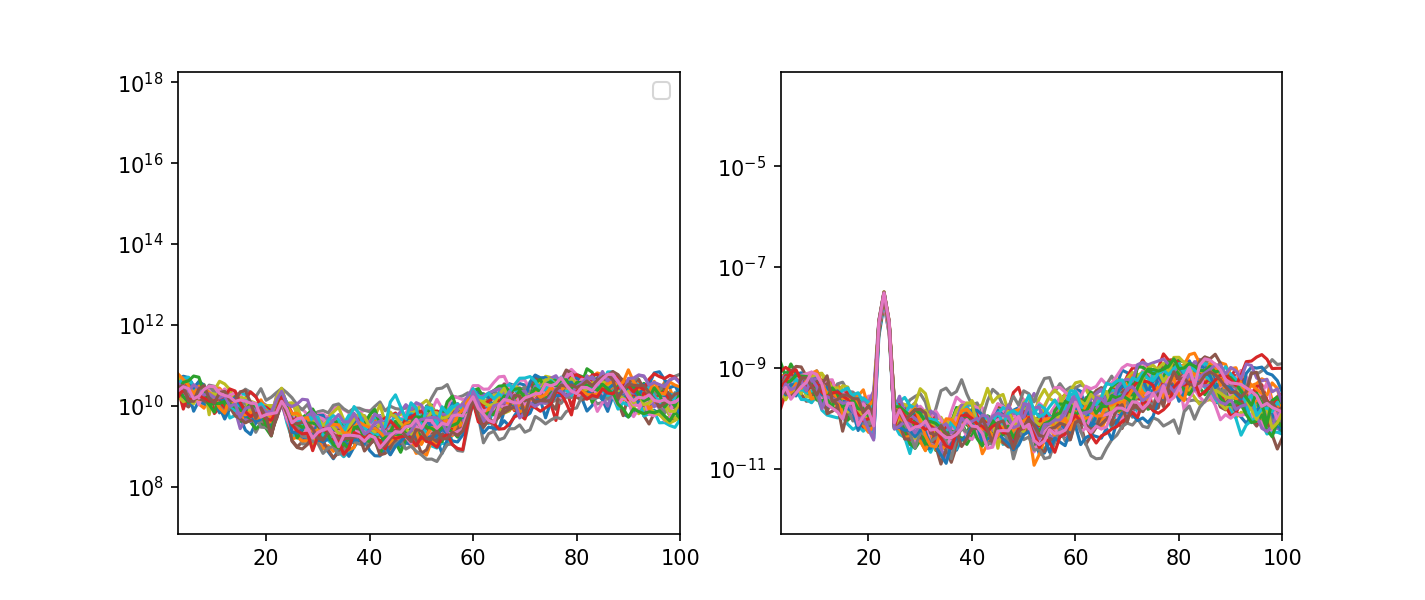

No handles with labels found to put in legend.


In [40]:
_,ax = plt.subplots(1,2,figsize=(9.5,4))
[ax[0].semilogy(*BDF_.welch_psd('z', res = 5000)) for BDF_ in BDF_signal[0::2]]
[ax[1].semilogy(*BDF_.welch_psd('x', res = 5000)) for BDF_ in BDF_signal[0::2]]
[a.set(xlim=(3,100)) for a in ax]
ax[0].legend()

In [119]:
ffts = [np.abs(np.fft.rfft(B.x2[:50000])) for B in BDFs3]
freq = np.fft.rfftfreq(len(BDFs3[0].x2[:50000]), d=1./5000)

In [124]:
std_array = []
mean_array = []
for ff in np.arange(160,180,0.1):
    values = np.array([np.sum(fft[(freq>ff)*(freq<ff+0.1)]) for fft in ffts])
    std_array.append(np.std(values))
    mean_array.append(np.mean(values))
std_array = np.array(std_array)
mean_array = np.array(mean_array)

In [125]:
from scipy.optimize import curve_fit

def func(x, a, b):
    return a * x + b

def func2(x, a, b, c):
    return a * x**c + b

<IPython.core.display.Javascript object>


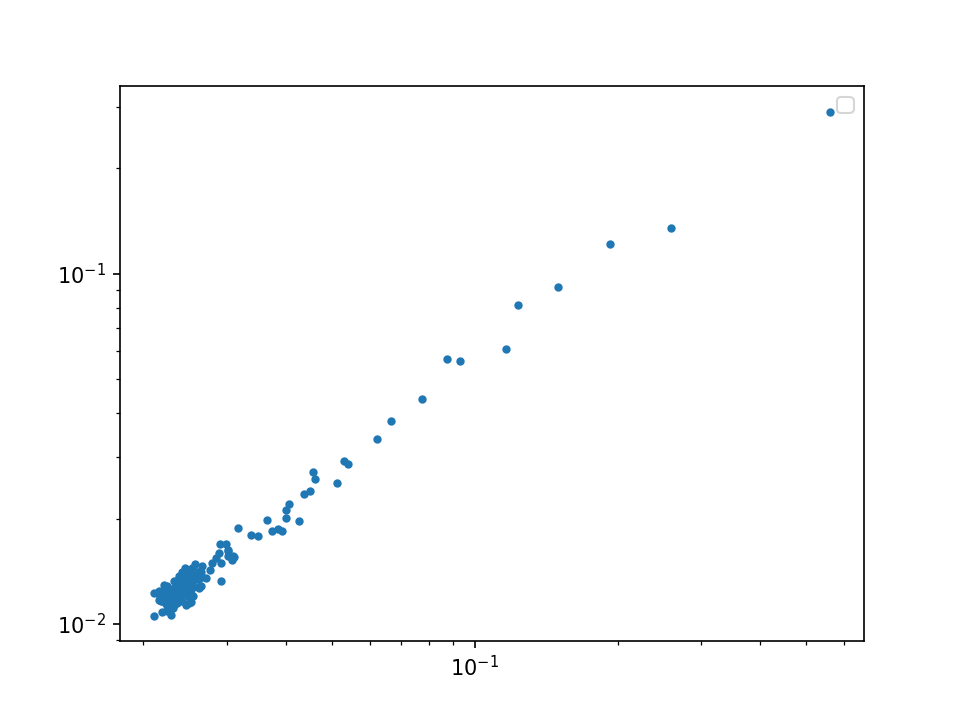

No handles with labels found to put in legend.


array([ 0.8996959 , -0.71509382])

In [126]:
_,ax = plt.subplots()
ax.loglog(mean_array, std_array, '.')

xdata, ydata = np.log(mean_array[mean_array>1e-1]), np.log(std_array[mean_array>1e-1])
popt, pcov = curve_fit(func, xdata, ydata)
# ax.plot(xdata, func(xdata, *popt), 'r-', label='fit: a=%5.3f, b=%5.3f' % tuple(popt))
# popt, pcov = curve_fit(func2, xdata, ydata)
# ax.plot(xdata, func2(xdata, *popt), 'g--', label='fit: a=%.2e, b=%5.4f, c=%5.4f' % tuple(popt))
ax.legend()
popt